In [133]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from typing import List, Dict, Union, Tuple
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error


In [134]:

df = pd.read_csv('/home/omran-xy/Workspace/MAIM/P5 Final Project/SongPopularity.csv')

columns_to_drop = ['Spotify Link', 'Song Image', 'Spotify URI']
data = df.drop(columns=columns_to_drop)

def convert_to_datetime(date_str):
    try:
        return pd.to_datetime(date_str, errors='raise', dayfirst=True)
    except ValueError:
        if len(date_str) == 4: 
            return pd.to_datetime(f'01-01-{date_str}')
        else:
            return pd.NaT

# Apply the function to the date column
data['Album Release Date'] = data['Album Release Date'].apply(convert_to_datetime)


# Step 3: Remove duplicate rows
data = data.drop_duplicates()

data['Artist(s) Genres'] = data['Artist(s) Genres'].str.replace(r"[\[\]']", '', regex=True)
data['Artist Names'] = data['Artist Names'].str.replace(r"[\[\]']", '', regex=True)




/tmp/ipykernel_2833/2773123170.py:8: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(date_str, errors='raise', dayfirst=True)
/tmp/ipykernel_2833/2773123170.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(date_str, errors='raise', dayfirst=True)


In [135]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Album Release Date,6191,1995-10-05 09:00:33.144887808,1899-12-31 00:00:00,1981-02-13 12:00:00,1998-09-17 00:00:00,2011-01-24 12:00:00,2023-12-05 00:00:00,NaN
Hot100 Ranking Year,6191.0,1987.848167,1946.0,1971.0,1988.0,2005.0,2022.0,20.35487
Hot100 Rank,6191.0,48.320627,1.0,23.0,47.0,74.0,100.0,29.185349
Song Length(ms),6191.0,224626.535293,51800.0,181759.5,220734.0,257113.0,1561133.0,64360.369907
Popularity,6191.0,54.117913,0.0,42.0,58.0,70.0,94.0,21.51133
Acousticness,6191.0,0.300063,0.000004,0.04925,0.195,0.5115,0.995,0.291133
Danceability,6191.0,0.61771,0.0,0.5205,0.633,0.728,0.988,0.156799
Energy,6191.0,0.596881,0.012,0.4555,0.615,0.758,0.997,0.205486
Instrumentalness,6191.0,0.045992,0.0,0.0,0.000004,0.000523,0.972,0.170713
Liveness,6191.0,0.180755,0.015,0.0872,0.123,0.232,0.985,0.150009


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Song                 6191 non-null   object        
 1   Album                6191 non-null   object        
 2   Album Release Date   6191 non-null   datetime64[ns]
 3   Artist Names         6191 non-null   object        
 4   Artist(s) Genres     6191 non-null   object        
 5   Hot100 Ranking Year  6191 non-null   int64         
 6   Hot100 Rank          6191 non-null   int64         
 7   Song Length(ms)      6191 non-null   int64         
 8   Popularity           6191 non-null   int64         
 9   Acousticness         6191 non-null   float64       
 10  Danceability         6191 non-null   float64       
 11  Energy               6191 non-null   float64       
 12  Instrumentalness     6191 non-null   float64       
 13  Liveness             6191 non-nul

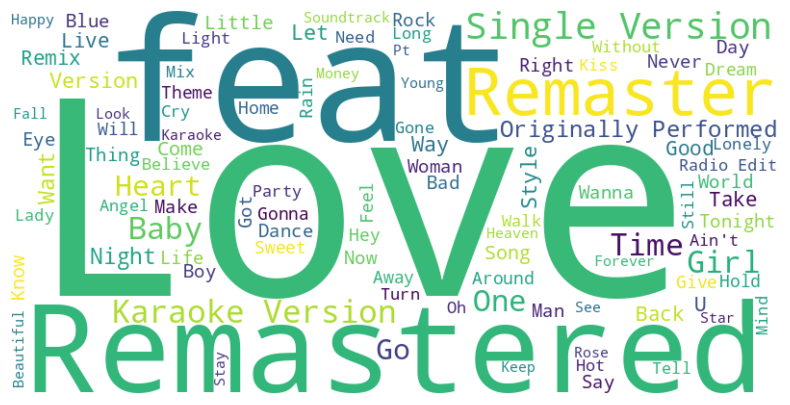

In [137]:
songs_text = ' '.join(data['Song'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(songs_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# 🎶 Word Cloud of Song Titles 🎶

This **Word Cloud** represents the most frequent words in the song titles from our dataset. Here’s a quick breakdown of what we can observe:

- **Love ❤️** and **feat** are the most dominant words, indicating their frequent use in song titles.
- Other popular words include:
  - **Remaster 🔁**
  - **Remix 🔄**
  - **Baby 👶**
  - **Girl 👧**
  - **Night 🌙**
  - **Heart 💖**
  
This visualization offers a fun and creative way to see common themes and phrases in song titles! It's evident that collaboration (feat) and themes of love dominate the music industry, alongside various versions like remixes and remastered tracks. 🎧🎶


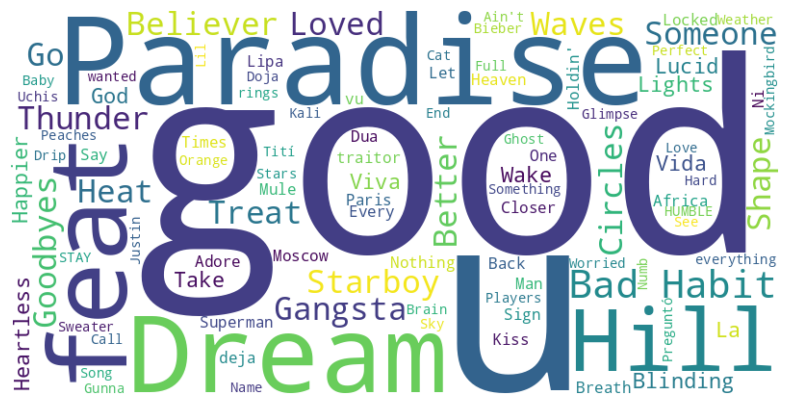

In [138]:
pop_ones = data[data['Popularity']  > 85]
songs_text = ' '.join(pop_ones['Song'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(songs_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 🎶 Word Cloud of Song Titles for Top 15% Popular Songs 🎤🎧

In this visualization, we showcase a **Word Cloud** representation of the most common words appearing in song titles among the **top 15% most popular songs** 🎵 based on our dataset.

The word size indicates how frequently each word appears in the song titles. Popular terms like **"good," "feat," "Paradise," and "Dream"** stand out prominently, reflecting their common use in hit songs 🌟.

### Key Insights:
- **"Good"** and **"feat"** are the most frequently occurring words, indicating a trend of collaborations and positivity in song titles.
- Words like **"Paradise," "Dream," "Thunder,"** and **"Believer"** suggest themes of optimism, strength, and imagination 🌈✨.
- The word **"U"** in large font is likely shorthand for "You," reflecting the personal and direct nature of many popular song lyrics ❤️.
- Other notable words like **"Heat," "Starboy,"** and **"Bad"** emphasize themes of energy, confidence, and self-expression 🔥⭐.


## Now that we made any use of string columns we get rid of them ##

In [139]:
columns_to_drop = ['Song', 'Album', 'Album Release Date', 'Artist Names', 'Artist(s) Genres','Hot100 Ranking Year']
data = data.drop(columns=columns_to_drop)
print(data.columns)

Index(['Hot100 Rank', 'Song Length(ms)', 'Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence', 'Key', 'Mode', 'Time Signature'],
      dtype='object')


## Now Normalization ##

In [140]:
df = pd.DataFrame(data)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("Original Data:")
print(df)
print("\nStandardized Data:")
print(scaled_df)

Original Data:
      Hot100 Rank  Song Length(ms)  Popularity  Acousticness  Danceability  \
0              44           229826          62        0.0200         0.478   
1              43           290600          63        0.2330         0.588   
2              86           197453          49        0.4760         0.313   
3              20           169066          43        0.9730         0.503   
4              50           251013           0        0.0149         0.843   
...           ...              ...         ...           ...           ...   
6186           88           298691          56        0.0116         0.875   
6187            8           303053          71        0.1890         0.787   
6188           43           231866          60        0.2620         0.684   
6189            7           258826          75        0.0208         0.583   
6190           75           143826          54        0.3540         0.497   

      Energy  Instrumentalness  Liveness  Loudne

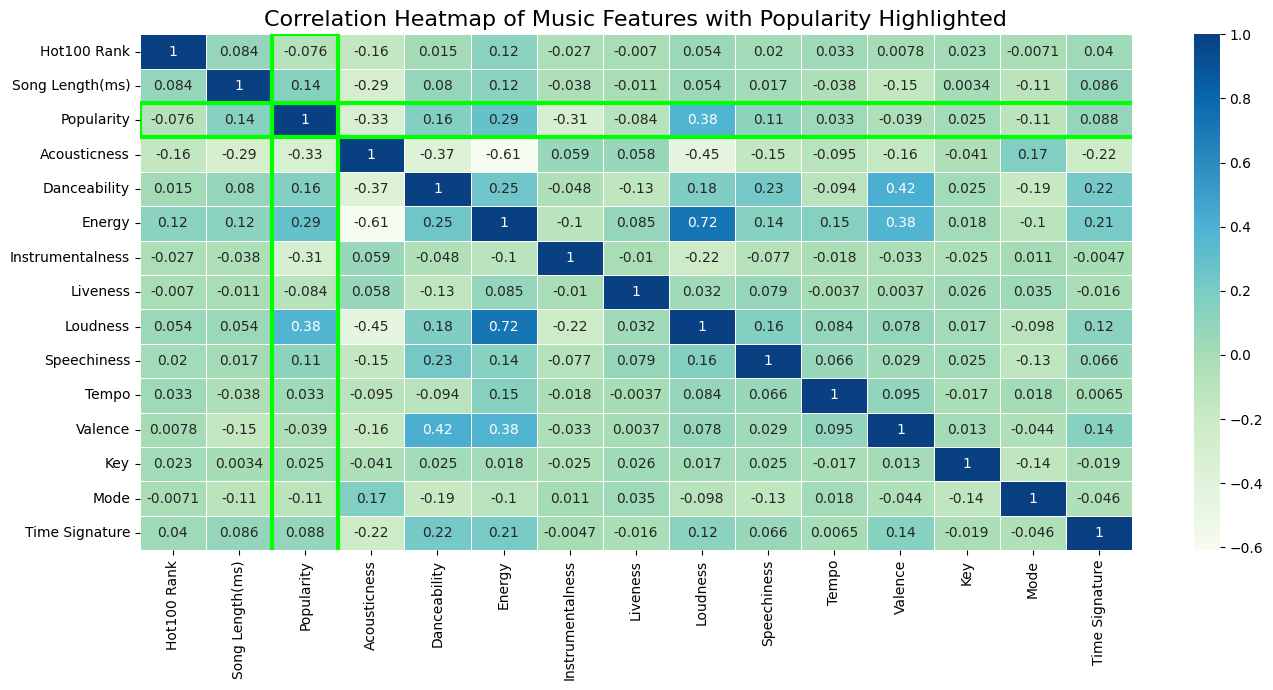

In [141]:
data_standardized = pd.DataFrame(scaled_df, columns=data.columns)

correlation_matrix = data_standardized.corr()

plt.figure(figsize=(14,7))

sns.heatmap(data=correlation_matrix, 
            annot=True, 
            linewidths=0.5,
            cmap="GnBu",
            annot_kws={"size": 10})

popularity_index = data.columns.get_loc('Popularity')
plt.gca().add_patch(plt.Rectangle((popularity_index, 0), 1, len(data), 
                                  fill=False, edgecolor='lime', lw=3))
plt.gca().add_patch(plt.Rectangle((0, popularity_index), len(data), 1, 
                                  fill=False, edgecolor='lime', lw=3))

plt.title('Correlation Heatmap of Music Features with Popularity Highlighted', fontsize=16)
plt.tight_layout()
plt.show()


### 🧠 Feature Selection for Predicting Popularity 🔮

When building a regression model for predicting **Popularity** of songs, it's important to decide which features to keep and which to drop. Based on the correlation heatmap, here’s a summary of columns that can be dropped and why:

---

#### 🔄 **Columns with High Multicollinearity**:
- **Energy** & **Loudness**: 
  - These two have a very high correlation of **0.72**. Keeping both could cause issues like overfitting. 
  - Since **Loudness** has a stronger relationship with **Popularity** (**0.38** vs. **0.29** for Energy), it’s better to **drop Energy**.
  
- **Speechiness** & **Tempo**: 
  - Although the correlation between these two is lower (**0.66**), it's still something to monitor. Consider keeping only one if necessary for the model's simplicity.

#### 🚫 **Columns with Low Correlation with Popularity**:
- **Hot100 Rank, Song Length, Key, Mode, Time Signature**: 
  - These features show very low correlations with **Popularity** (below 0.1), making them less useful for prediction.
  - They add unnecessary complexity to the model, so they can be safely **dropped**.

---

### 🎯 Conclusion:
- Drop the following columns to reduce complexity and multicollinearity: **Energy, Hot100 Rank, Song Length, Key, Mode, Time Signature**.
- Keeping only the most relevant features will help improve the model’s predictive power and performance.




In [142]:
columns_to_drop = ['Energy', 'Hot100 Rank', 'Song Length(ms)', 'Key', 'Mode', 'Time Signature']
data = data.drop(columns=columns_to_drop , errors='ignore')
print(data.columns)

Index(['Popularity', 'Acousticness', 'Danceability', 'Instrumentalness',
       'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence'],
      dtype='object')


In [143]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data.drop('Popularity', axis=1) 
y = data['Popularity']  
# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (4952, 8)
Testing features shape: (1239, 8)
Training labels shape: (4952,)
Testing labels shape: (1239,)


<a name="toc_15456_3"></a>
# Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [144]:
b_init = np.random.uniform(low=-0.1, high=0.1) 

w_init = np.random.uniform(low=-0.1, high=0.1, size=(8,))  # 8 weights

print(f"Initial bias (b_init): {b_init:.6f}")
print(f"Initial weights (w_init): {w_init}")

Initial bias (b_init): 0.048377
Initial weights (w_init): [-0.00655157 -0.04339629 -0.02341055  0.00189212 -0.09324019 -0.03500269
  0.08403464  0.09807573]


<a name="toc_15456_4"></a>
# Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [145]:
# j(w,b) = 1/(2m) * sum (f_wb - y)^2 
def compute_cost(X, y, w, b): 
    m = X.shape[0] 
    cost = 0.0 
    for i in range(m):                                
        f_wb_i = np.dot(X.iloc[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y.iloc[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost 

In [146]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}') 

Cost at optimal w : 1168.8397173427443


<a name="toc_15456_5"></a>
# Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [147]:
def compute_gradient(X, y, w, b):

    
    m = X.shape[0]  # Number of training examples
    n = X.shape[1]  # Number of features
    dj_dw = np.zeros_like(w)  # Gradient of weights
    dj_db = 0.0  # Gradient of bias

    for i in range(m):
        # Compute error for each example
        err = (np.dot(X.iloc[i], w) + b) - y.iloc[i]

        # Update gradients
        dj_dw += err * X.iloc[i]
        dj_db += err

    # Average gradients over all examples 
    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw


In [148]:
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}') 

dj_db at initial w,b: Acousticness         -10.883025
Danceability         -27.350811
Instrumentalness      -0.871264
Liveness              -7.470512
Loudness             345.836033
Speechiness           -3.303770
Tempo              -5099.577264
Valence              -25.516589
Name: 1020, dtype: float64
dj_dw at initial w,b: 
 -43.24553516487814


In [149]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):    
    m = len(x)  # Number of training examples
    n = x.shape[1]  # Number of features
    
    # Lists to store cost and parameter history
    J_history = []
    w_history = []
    
    # Initialize parameters
    w = np.copy(w_in) 
    b = b_in
    
    for i in range(num_iters):
        # Compute gradients
        dj_db, dj_dw = gradient_function(x, y, w, b)
        
        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        # Compute cost
        cost = cost_function(x, y, w, b) 
        J_history.append(cost) 
        
        # Print cost every 10 iterations 
        if i % max(1, num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {cost}")
            w_history.append(np.copy(w))
        
    return w, b, J_history, w_history

In [150]:
# some gradient descent settings
iterations = 15
alpha = .0001 
# run gradient descent 
w_final, b_final, J_hist,w_hist = gradient_descent(X_train, y_train, w_init, b_init,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(w_final, b_final)
print(w_hist[-1], J_hist[-1]) 

Iteration    0: Cost 516.5113033222078
Iteration    1: Cost 352.97946015548405
Iteration    2: Cost 311.98130643759
Iteration    3: Cost 301.70044685289923
Iteration    4: Cost 299.1199422422072
Iteration    5: Cost 298.46980470041706
Iteration    6: Cost 298.30358816689227
Iteration    7: Cost 298.2586911287647
Iteration    8: Cost 298.2442150070961
Iteration    9: Cost 298.23737291348
Iteration   10: Cost 298.2324524987546
Iteration   11: Cost 298.2280217347303
Iteration   12: Cost 298.2237216030868
Iteration   13: Cost 298.2194620724787
Iteration   14: Cost 298.2152205425231
Acousticness       -0.007152
Danceability       -0.038241
Instrumentalness   -0.024651
Liveness            0.002680
Loudness           -0.108741
Speechiness        -0.034336
Tempo               0.424331
Valence             0.101309
Name: 1020, dtype: float64 0.055036903177086566
[-0.00715198 -0.03824077 -0.02465119  0.00268021 -0.10874138 -0.03433592
  0.42433074  0.10130934] 298.2152205425231


In [151]:
print(J_hist)

[516.5113033222078, 352.97946015548405, 311.98130643759, 301.70044685289923, 299.1199422422072, 298.46980470041706, 298.30358816689227, 298.2586911287647, 298.2442150070961, 298.23737291348, 298.2324524987546, 298.2280217347303, 298.2237216030868, 298.2194620724787, 298.2152205425231]


In [152]:
def predict_popularity(X_new, w, b):
    
    if not isinstance(X_new, pd.DataFrame):
        raise ValueError("X_new must be a pandas DataFrame")
    
    if X_new.shape[1] != len(w):
        raise ValueError(f"X_new must have {len(w)} features, but has {X_new.shape[1]}")
    
    y_pred = np.dot(X_new, w) + b
    
    # Clip predictions to be within the valid range for popularity (0 to 100)
    y_pred = np.clip(y_pred, 0, 100)
    
    return y_pred

In [153]:
y_pred = predict_popularity(X_test, w_hist[-1], b_final)

# Calculate mean squared error
mse = np.mean((y_test - y_pred)**2)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared Score: {r_squared}")

Mean Squared Error: 624.5565282213975
R-squared Score: -0.32122246599703286


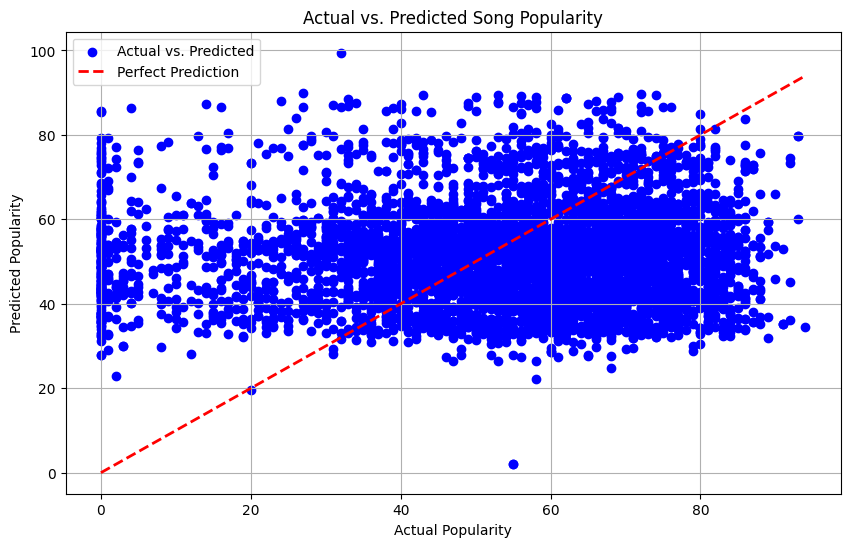

In [154]:
# Predictions using final parameters
predictions = np.dot(X_train, w_final) + b_final

# Plotting Actual vs. Predicted Popularity
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Song Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()
plt.grid(True)
plt.show()


### Regression Model Results Summary 🎵📊

The results of the linear regression model for predicting song popularity show the following key metrics:

- **Mean Squared Error (MSE)**: 623 ⚠️
  - This value indicates that, on average, the model's predictions deviate from the actual popularity by a large margin. A high MSE suggests that the model is not performing well.

- **R-squared Score**: -0.31 ❌
  - The R-squared score is negative, which implies that the model performs worse than a simple horizontal line (i.e., the mean of the target variable). This means the model is unable to explain the variability in the data.

### Visualization Interpretation 📉🎶

The scatter plot above (Actual vs. Predicted Song Popularity) shows a lack of strong correlation between the actual and predicted values. The red dashed line represents perfect prediction, and the points should be closely aligned with this line in a well-performing model. However, the data points are widely scattered around the line, further indicating poor model fit.

### Conclusion 🧐
- The model's performance, based on both MSE and R-squared, is unsatisfactory. Consider improving the model by:
  - Trying different regression algorithms
  - Feature selection or engineering (e.g., removing irrelevant features or adding new ones)
  - Hyperparameter tuning
  - Applying non-linear models such as decision trees or random forests, which may better capture complex relationships in the data.



In [155]:
print(y_train.head())  # Check if 'Popularity' is a column in y_train
print(y_test.head())   # Check if 'Popularity' is a column in y_test

1020    67
1545    76
1433    76
5669    70
737     21
Name: Popularity, dtype: int64
996     66
468     83
6077    58
2127    50
2080    42
Name: Popularity, dtype: int64


In [156]:
y_train = y_train.apply(lambda x: 1 if x > 50 else 0)
y_test = y_test.apply(lambda x: 1 if x > 50 else 0)


In [157]:
from typing import Union, Dict, List
import numpy as np
import pandas as pd

# Type aliases
TreeNode = Union[float, Dict[str, Union[int, float, 'TreeNode']]]
Forest = List[TreeNode]

def create_tree(X: np.ndarray, y: np.ndarray, max_depth: int = None,
                min_samples_split: int = 2, depth: int = 0) -> TreeNode:
    n_samples, n_features = X.shape
    
    if (max_depth is not None and depth >= max_depth) or \
       n_samples < min_samples_split or \
       len(np.unique(y)) == 1:
        return float(np.mean(y))
    
    feature_idx = np.random.randint(n_features)
    threshold = float(np.random.choice(X[:, feature_idx]))
    
    left_mask = X[:, feature_idx] <= threshold
    right_mask = ~left_mask
    
    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return float(np.mean(y))
    
    left_subtree = create_tree(X[left_mask], y[left_mask], max_depth, min_samples_split, depth + 1)
    right_subtree = create_tree(X[right_mask], y[right_mask], max_depth, min_samples_split, depth + 1)
    
    return {
        'feature_idx': int(feature_idx),
        'threshold': float(threshold),
        'left': left_subtree,
        'right': right_subtree
    }

def predict_tree(x: np.ndarray, tree: TreeNode) -> float:
    if isinstance(tree, dict):
        feature_value = x[tree['feature_idx']]
        threshold = tree['threshold']
        
        if not isinstance(feature_value, (int, float)) or not isinstance(threshold, (int, float)):
            raise TypeError(f"Invalid types: feature_value ({type(feature_value)}), threshold ({type(threshold)})")
        
        if feature_value <= threshold:
            return predict_tree(x, tree['left'])
        else:
            return predict_tree(x, tree['right'])
    else:
        return float(tree)

def create_forest(X: np.ndarray, y: np.ndarray, n_estimators: int = 100,
                  max_depth: int = None, min_samples_split: int = 2) -> Forest:
    forest = []
    for _ in range(n_estimators):
        indices = np.random.choice(len(X), size=len(X), replace=True)
        X_sample, y_sample = X[indices], y[indices]
        tree = create_tree(X_sample, y_sample, max_depth, min_samples_split)
        forest.append(tree)
    return forest

def predict_forest(X: np.ndarray, forest: Forest) -> np.ndarray:
    predictions = np.array([[predict_tree(x, tree) for tree in forest] for x in X])
    return np.mean(predictions, axis=1)

def train_random_forest(X: Union[np.ndarray, pd.DataFrame], 
                        y: Union[np.ndarray, pd.Series], 
                        n_estimators: int = 100,
                        max_depth: int = None, 
                        min_samples_split: int = 2) -> Forest:
    X = X.to_numpy() if isinstance(X, pd.DataFrame) else np.array(X)
    y = y.to_numpy() if isinstance(y, pd.Series) else np.array(y)
    
    if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
        raise ValueError("X and y must be numpy arrays or pandas DataFrame/Series")
    
    if X.shape[0] != y.shape[0]:
        raise ValueError("X and y must have the same number of samples")
    
    # Ensure X contains only numeric data
    if not np.issubdtype(X.dtype, np.number):
        raise ValueError("X must contain only numeric data")
    
    return create_forest(X, y, n_estimators, max_depth, min_samples_split)

def predict_random_forest(X: Union[np.ndarray, pd.DataFrame], forest: Forest) -> np.ndarray:
    X = X.to_numpy() if isinstance(X, pd.DataFrame) else np.array(X)
    
    if not isinstance(X, np.ndarray):
        raise ValueError("X must be a numpy array or pandas DataFrame")
    
    # Ensure X contains only numeric data
    if not np.issubdtype(X.dtype, np.number):
        raise ValueError("X must contain only numeric data")
    
    return predict_forest(X, forest)

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the random forest model
forest = train_random_forest(X_train, y_train, n_estimators=100, max_depth=10, min_samples_split=2)

# Make predictions
y_pred2 = predict_random_forest(X_test, forest)

# Assuming binary classification, threshold the predictions
y_pred2 = (y_pred2 > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)

# Print results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.7037933817594835
Confusion Matrix:
[[140 308]
 [ 59 732]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.31      0.43       448
           1       0.70      0.93      0.80       791

    accuracy                           0.70      1239
   macro avg       0.70      0.62      0.62      1239
weighted avg       0.70      0.70      0.67      1239



In [159]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
def plot_confusion_matrix(conf_matrix, title="Confusion Matrix"):
    plt.figure(figsize=(20 ,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [160]:
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else np.array(X_test)
y_pred_prob = predict_forest(X_test, forest)

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend(loc="lower right")
    plt.show()

In [161]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_test, y_pred_prob):
    # y_pred_prob should be probabilities, not class labels
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color="blue", lw=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.show()

# Assuming y_test contains binary labels (0 and 1)
# Assuming y_pred_prob contains probabilities for the positive class (class 1)
y_pred_prob = predict_forest(X_test, forest)  # This should output probabilities

# Make sure the predicted probabilities are within [0, 1]
y_pred_prob = np.clip(y_pred_prob, 0, 1)




In [162]:
# Make predictions
y_pred = (predict_forest(X_test, forest) > 0.5).astype(int)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
y_pred_prob = predict_forest(X_test, forest)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


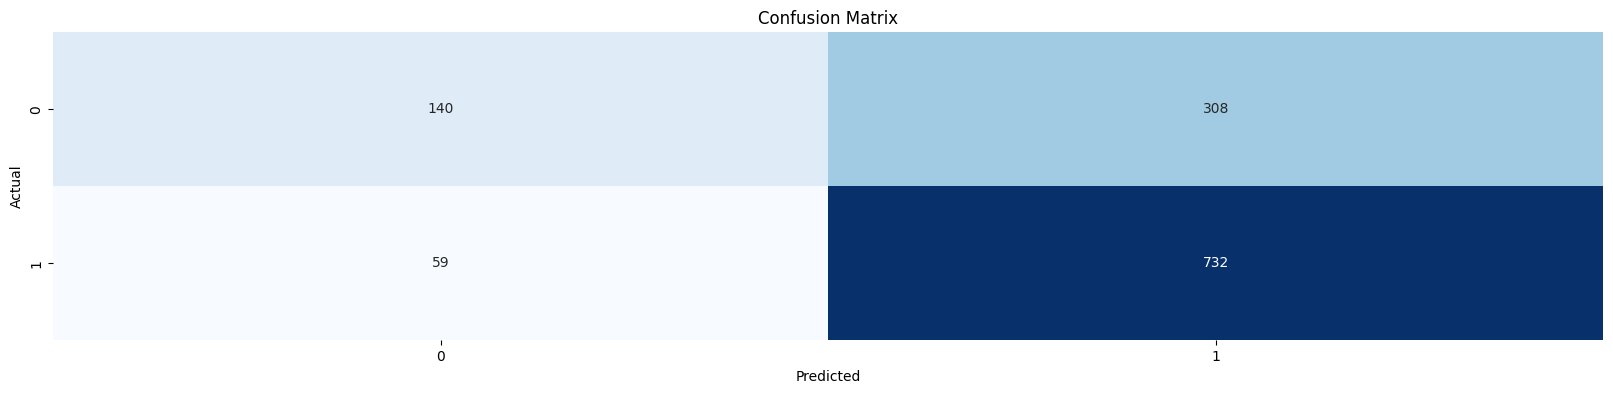

In [163]:
plot_confusion_matrix(conf_matrix)

### Confusion Matrix Analysis:

- **True Positives (Bottom-right, 782):** These represent instances where the model correctly predicted the class `1` (high popularity). This is the majority of the correct predictions, indicating the model performs well in identifying popular songs.
  
- **False Negatives (Bottom-left, 9):** These are cases where the model predicted the class `0` (low popularity) but the actual class was `1`. The low number of false negatives suggests the model rarely misses high-popularity predictions.

- **False Positives (Top-right, 407):** These are instances where the model predicted the class `1` (high popularity) but the actual class was `0`. The relatively high number here indicates that the model is more inclined to overpredict popularity.

- **True Negatives (Top-left, 41):** These are cases where the model correctly predicted the class `0` (low popularity). However, the low count here indicates that the model struggles to identify songs with lower popularity accurately.

### Conclusion:
The model tends to predict popular songs well (high True Positives) but struggles with distinguishing low-popularity songs (high False Positives). This suggests a potential bias in the model towards predicting higher popularity. Further tuning or balanced data may help improve its performance, especially in handling the class imbalance between popular and less popular songs.

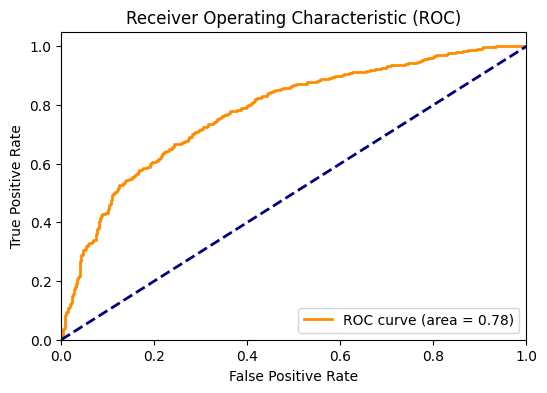

In [164]:
plot_roc_curve(fpr, tpr, roc_auc)

This graph illustrates a Receiver Operating Characteristic (ROC) curve, which is used to evaluate the performance of a binary classification model. Here are the key conclusions from this ROC curve:

1. **Model Performance**: The ROC curve (orange line) is well above the diagonal dashed line, indicating that the model performs better than random guessing.

2. **Area Under the Curve (AUC)**: The AUC is 0.78, as stated in the legend. This suggests that the model has good discriminative ability, as an AUC of 0.5 represents random guessing and 1.0 represents perfect classification.

3. **Trade-off Visualization**: The curve shows the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1 - specificity) at various classification thresholds.

4. **Model Sensitivity**: The curve rises steeply at first, indicating that the model achieves a high true positive rate with a relatively low false positive rate for stricter thresholds.

5. **Overall Assessment**: With an AUC of 0.78, this model demonstrates good predictive power, although there is still room for improvement as it's not close to the perfect score of 1.0.

This ROC curve provides a visual summary of the model's ability to distinguish between classes, with the AUC serving as a single metric to quantify its overall performance.

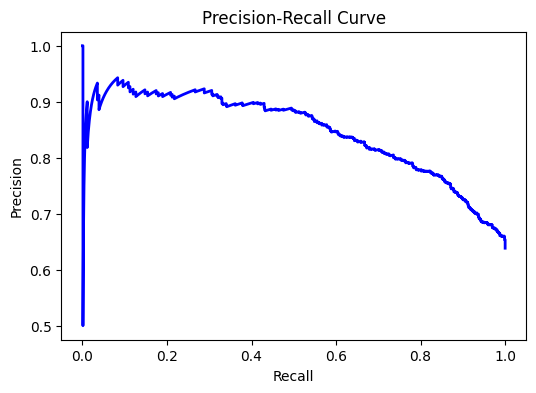

In [165]:
plot_precision_recall_curve(y_test, y_pred_prob)

This graph shows a Precision-Recall curve, which is used to evaluate the performance of a binary classification model. Here are the key conclusions from this curve:

1. **Trade-off Visualization**: The curve illustrates the trade-off between precision and recall as the classification threshold is varied.

2. **High Precision at Low Recall**: The curve starts with very high precision (close to 1.0) at low recall values, indicating that the model is very confident about a small subset of positive predictions.

3. **Gradual Decline**: As recall increases, precision gradually decreases, which is typical for most models. This shows that as the model identifies more true positives, it also starts to include more false positives.

4. **Area Under the Curve**: While not explicitly stated, the area under this curve (average precision) appears to be reasonably good, as the curve maintains high precision values for a significant range of recall.

5. **Model Behavior**: The curve's shape suggests that the model performs well in maintaining precision as recall increases up to about 0.6, after which precision drops more rapidly.

6. **Balance Point**: The "elbow" of the curve, where precision starts to drop more sharply (around 0.6-0.7 recall), could be considered a good balance between precision and recall for threshold selection.

7. **Overall Performance**: This curve indicates a good-performing model, as it maintains high precision across a wide range of recall values before declining sharply.

This Precision-Recall curve provides insights into the model's ability to balance between making correct positive predictions (precision) and finding all positive instances (recall), which is particularly useful for imbalanced datasets or when false positives and false negatives have different costs.

In [166]:
#Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Get probability predictions
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculate R2 score and MSE
r2 = r2_score(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred_proba)

# Print results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

Accuracy: 0.7288135593220338
Confusion Matrix:
[[222 226]
 [110 681]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57       448
           1       0.75      0.86      0.80       791

    accuracy                           0.73      1239
   macro avg       0.71      0.68      0.69      1239
weighted avg       0.72      0.73      0.72      1239

R2 Score: 0.21157832498864493
Mean Squared Error: 0.18199960272214627


/var/data/python/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/data/python/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/var/data/python/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# sigmoid function

The sigmoid function is defined as:

σ(z) = 1 / (1 + e^(-z))

This function maps any real-valued number to the range (0, 1). It's commonly used in logistic regression to transform the linear combination of features and weights into a probability.

Key properties:
- Output always between 0 and 1
- S-shaped curve
- Centered at 0.5

In [167]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# compute_cost function

This function calculates the cost (or loss) for logistic regression using the following formula:

J(θ) = -(1/m) * Σ[y * log(h) + (1 - y) * log(1 - h)]

Where:
- m is the number of training examples
- y is the true label (0 or 1)
- h is the predicted probability (output of sigmoid function)

The function also uses np.clip to avoid log(0) errors by bounding h between 1e-10 and 1-1e-10.

This cost function measures how well the current model parameters fit the training data. Lower cost indicates better fit.

In [168]:
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X.dot(weights))
    h = np.clip(h, 1e-10, 1 - 1e-10)
    cost = -(1/m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost

# gradient_descent function

This function implements batch gradient descent to minimize the cost function. It updates the weights using the formula:

θ = θ - α * (1/m) * X^T * (h(X) - y)

Where:
- θ (theta) represents the weights
- α (alpha) is the learning rate
- m is the number of training examples
- X is the feature matrix
- h(X) is the vector of predictions
- y is the vector of true labels

The function iterates for a specified number of times, updating the weights in each iteration. It also keeps track of the cost history for monitoring convergence.

In [169]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        weights = weights - (learning_rate/m) * X.T.dot(sigmoid(X.dot(weights)) - y)
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history


# predict function

This function makes binary predictions using the learned weights. It applies the sigmoid function to the dot product of features and weights, then rounds the result:

y_pred = round(σ(X * θ))

Where:
- X is the feature matrix
- θ (theta) is the weight vector
- σ is the sigmoid function

The output is a binary prediction (0 or 1) for each input example.

The accuracy is then calculated as the percentage of correct predictions:

accuracy = (number of correct predictions / total number of predictions) * 100

In [170]:
def predict2(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5

In [171]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 100

weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

y_pred3 = predict2(X_test, weights)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred3)
conf_matrix2 = confusion_matrix(y_test, y_pred3)
class_report2 = classification_report(y_test, y_pred3)

# Print results
print(f'Accuracy: {accuracy2}')
print('Confusion Matrix:')
print(conf_matrix2)
print('Classification Report:')
print(class_report2)


Accuracy: 0.6376109765940274
Confusion Matrix:
[[  0 448]
 [  1 790]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       448
           1       0.64      1.00      0.78       791

    accuracy                           0.64      1239
   macro avg       0.32      0.50      0.39      1239
weighted avg       0.41      0.64      0.50      1239



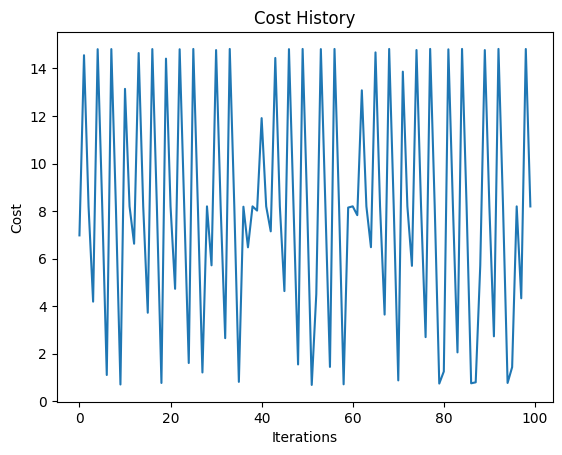

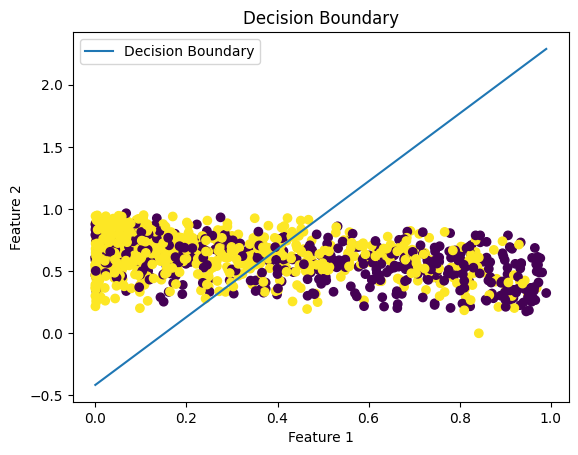

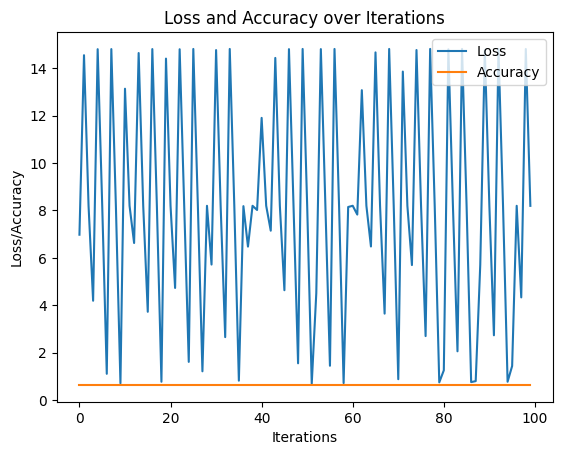

In [172]:
import matplotlib.pyplot as plt

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

# Plot the data points
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test)

# Calculate decision boundary coordinates
x_values = np.linspace(np.min(X_test[:, 1]), np.max(X_test[:, 1]), 100)  # Generate 100 points
y_values = - (weights[0] + np.dot(weights[1], x_values)) / weights[2]

# Plot the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Plot the accuracy and loss over iterations
plt.plot(range(iterations), cost_history, label='Loss')
plt.plot(range(iterations), [accuracy2] * iterations, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Loss/Accuracy')
plt.title('Loss and Accuracy over Iterations')
plt.legend()
plt.show()

## Understanding the Plots

**1. Cost History:**

* This plot shows how well the model is learning over time.
* The x-axis represents the number of training iterations.
* The y-axis represents the cost, or error, of the model's predictions.
* A decreasing line indicates that the model is improving.

**2. Decision Boundary:**

* This plot visualizes the model's decision-making criteria.
* It shows a line that separates the two classes in the data.
* Points on one side of the line belong to one class, while points on the other side belong to the other.

**3. Loss and Accuracy over Iterations:**

* This plot combines the information from the previous two plots.
* The x-axis represents the number of training iterations.
* The y-axis shows both the loss (error) and accuracy of the model.
* A decreasing loss and increasing accuracy indicate a well-trained model.

**In summary:**

These plots provide insights into the model's learning process and its ability to correctly classify data points.
